In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_image(image, title="Image"):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
    plt.title(title)
    plt.axis("off")
    plt.show()

In [11]:
# 1. Read the Image
image = cv2.imread("Image1.jpg")

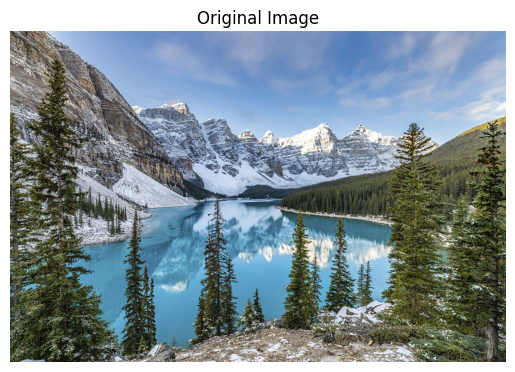

In [12]:
# 2. Display the Original Image
show_image(image, "Original Image")

In [13]:
# 3. Extract Image Size
height, width, channels = image.shape
print(f"Image Size: Width={width}, Height={height}, Channels={channels}")

Image Size: Width=1200, Height=800, Channels=3


In [14]:
# 4. Calculate Total Pixels
num_pixels = height * width
print(f"Total Number of Pixels: {num_pixels}")

Total Number of Pixels: 960000


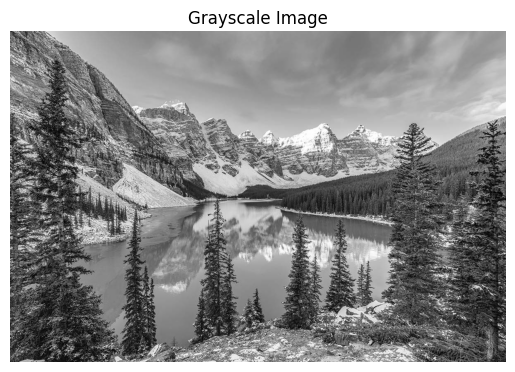

In [15]:
# 5. Convert BGR to Grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite("gray_image.jpg", gray_image)  # Save grayscale image
show_image(gray_image, "Grayscale Image")

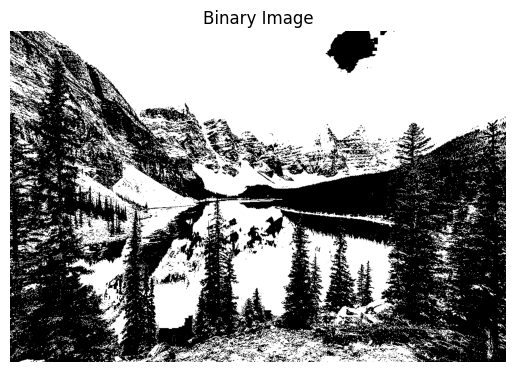

In [16]:
# 6. Convert Grayscale to Binary using Thresholding
threshold_value = 128  # You can adjust this threshold
_, binary_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)
cv2.imwrite("binary_image.jpg", binary_image)  # Save binary image
show_image(binary_image, "Binary Image")

In [17]:
# Count Black Pixels in Binary Image
black_pixel_count = np.sum(binary_image == 0)
print(f"Number of Black Pixels: {black_pixel_count}")
print(f"Size of Binary Image: {binary_image.shape}")

Number of Black Pixels: 468097
Size of Binary Image: (800, 1200)


**Task-2**

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import prewitt, roberts

def show_image(title, image, cmap='gray'):
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

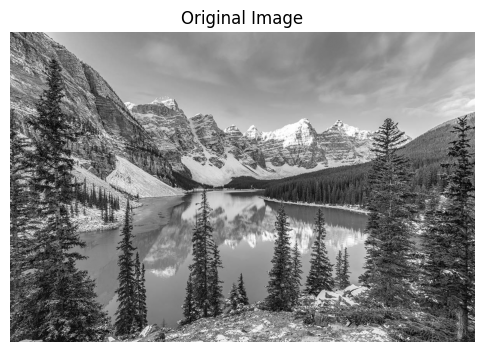

In [23]:
# Load image
image = cv2.imread('/content/Image1.jpg', cv2.IMREAD_GRAYSCALE)
show_image("Original Image", image)

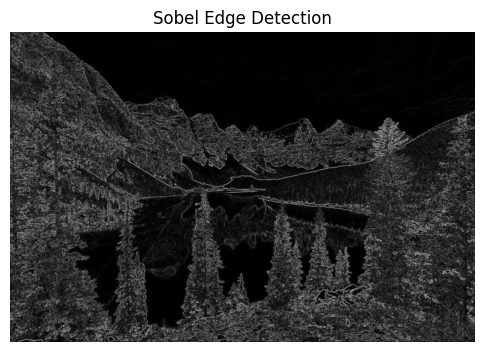

In [24]:
# 1. Edge Detection
# i. Sobel Operator
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = cv2.magnitude(sobel_x, sobel_y)
show_image("Sobel Edge Detection", sobel_edges)

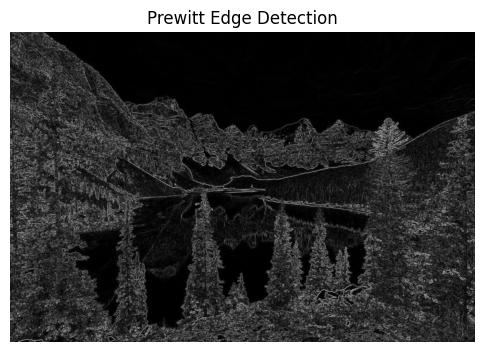

In [25]:
# ii. Prewitt Operator
prewitt_edges = prewitt(image)
show_image("Prewitt Edge Detection", prewitt_edges)

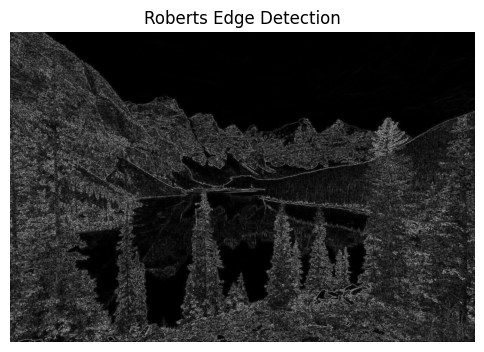

In [26]:
# iii. Roberts Cross Operator
roberts_edges = roberts(image)
show_image("Roberts Edge Detection", roberts_edges)

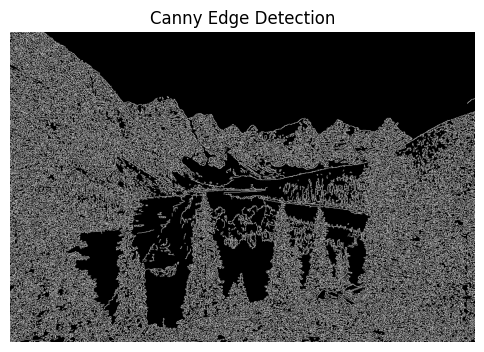

In [27]:
# iv. Canny Edge Detector
canny_edges = cv2.Canny(image, 100, 200)
show_image("Canny Edge Detection", canny_edges)

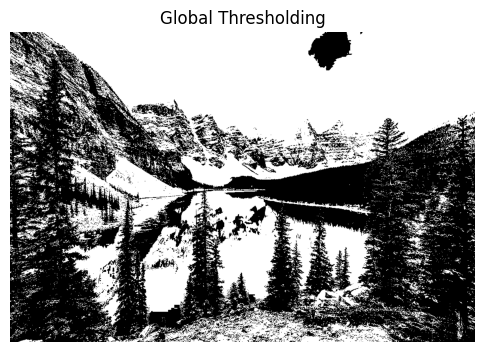

In [28]:
# 2. Image Segmentation
# i. Global Thresholding
_, global_thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
show_image("Global Thresholding", global_thresh)

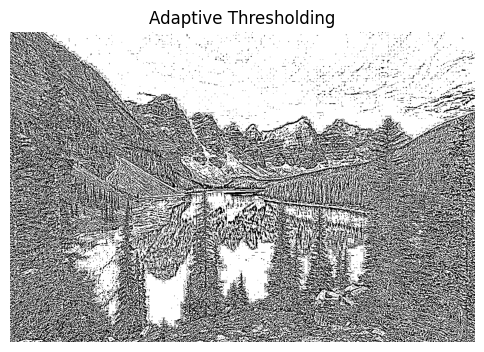

In [29]:
# ii. Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
show_image("Adaptive Thresholding", adaptive_thresh)

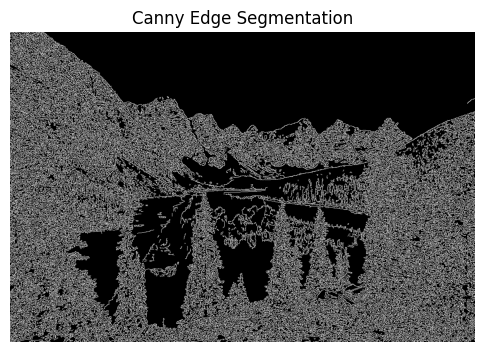

In [30]:
# iii. Edge Detection for Segmentation (Canny)
show_image("Canny Edge Segmentation", canny_edges)

In [33]:
# iv. Region-Based Segmentation (Watershed)
image_color = cv2.imread('Image1.jpg')  # Load original in color
gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

In [34]:
# Noise removal
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

In [35]:
# Sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

In [36]:
# Sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

In [37]:
# Markers
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

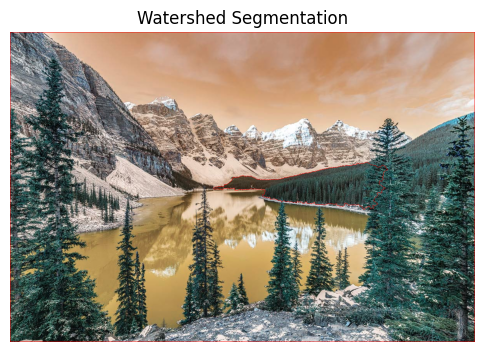

In [38]:
# Apply Watershed
cv2.watershed(image_color, markers)
image_color[markers == -1] = [255, 0, 0]
show_image("Watershed Segmentation", image_color, cmap=None)